In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, log, exp

In [68]:
def normal_sample(N, k=1, random_state=None):
    np.random.seed(random_state)
    return np.random.normal(0, 1, size=(k, N))

def brownian_motion(T, N, k=1, random_state=None):
    dW = normal_sample(N, k) * sqrt (T / N)
    return np.insert(dW.cumsum(axis=0), 0, 0, 1)

def GBM(T, N, mu, sigma, S_0, k=1, random_state=None):
    time = np.linspace(0, T, N+1)
    W = brownian_motion(T, N, k)
    S = S_0 * np.exp((mu - (sigma ** 2) / 2) * time + sigma * W)
    return (S)

def UO (T, N, alpha, gamma, sigma, S_0, k=1, random_state=None):
    time = np.linspace(0, T, N+1)
    dW = normal_sample(N, k) * sqrt (T / N)
    integral = np.insert(np.cumsum(np.exp(alpha * time[1:]) * dW, axis=1), 0, 0, 1)
    S = S_0 * np.exp(-alpha * time) + gamma * (1 - np.exp(-alpha * time)) + \
    sigma * np.exp(-alpha * time) * integral
    return S

In [50]:
brownian_motion(1,100,1)

array([[ 0.        , -0.19140182,  0.00957534, -0.07131117, -0.03543369,
         0.03971871, -0.07102096,  0.08535644, -0.13167247,  0.14311969,
        -0.12546389, -0.05143171, -0.17035753, -0.06032433, -0.13411056,
         0.10129978, -0.17207503,  0.15455532, -0.14430766,  0.11003517,
        -0.08471533, -0.05043283,  0.05905778,  0.02253856, -0.04477437,
        -0.01869065,  0.02541173,  0.00221319, -0.0149072 ,  0.05549728,
         0.02095098, -0.03031793, -0.03800044, -0.05942531, -0.10359518,
        -0.00759771, -0.07154847,  0.05252565, -0.11998017,  0.11533158,
        -0.20021974,  0.01901693, -0.12319663,  0.06365988,  0.21907179,
        -0.03722383, -0.13427122,  0.06495359,  0.04166394,  0.04562856,
        -0.04077603, -0.13039933,  0.11599419, -0.02968177, -0.0486899 ,
         0.00913627,  0.07878601, -0.27935616,  0.06779205, -0.14675395,
         0.00730087, -0.03770136,  0.03485317,  0.05211791,  0.02913213,
         0.11113818,  0.10032249,  0.02769274,  0.0

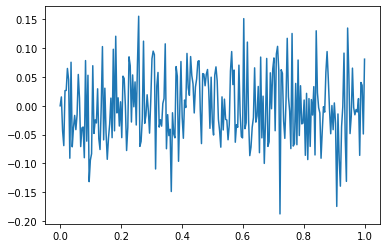

In [75]:
plt.plot(np.linspace(0,1,253), brownian_motion(1, 252).T)

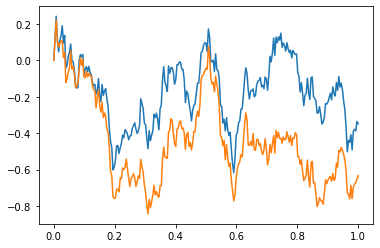

In [83]:
plt.plot(np.linspace(0, 1, 253), correlated_brownian_motions(1, 252, 0.9))

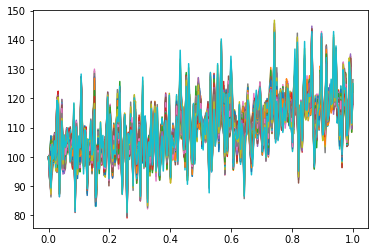

In [59]:
plt.plot(np.linspace(0,1,253),GBM(1, 252, 0.2, 0.2, 100, 50).T)

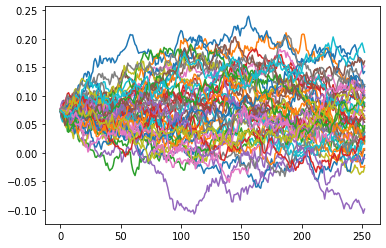

In [73]:
plt.plot(UO(1, 252, 1, 0.055, 0.1, 0.075, 50).T)